In [69]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)


In [71]:
df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
df.columns = ['X1','X2','Y']
df

,X1,X2,Y
0,-0.536678,-0.825370,0
1,-0.175123,-0.085810,1
2,-0.131495,-0.305387,1
3,0.968935,-0.101259,0
4,-0.039440,0.300798,1
...,...,...,...
395,-0.197995,-0.289297,1
396,0.966117,-0.236738,0
397,-0.910759,-0.425342,0
398,0.102186,1.073732,0


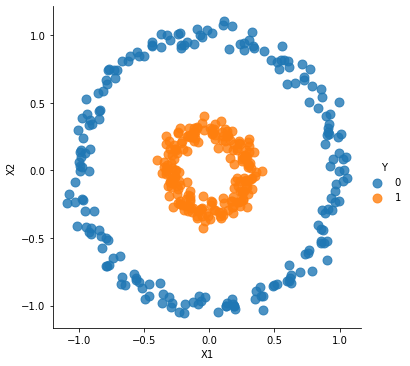

In [72]:
"""
Dapat dilihat bahwa pemisah antar kategori tidak linier melainkan fungsi lingkaran
"""
sns.lmplot( x="X1", y="X2",
  data=df, 
  fit_reg=False, 
  hue='Y', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) 

# PCA vs Kernel PCA

In [73]:
from sklearn.decomposition import PCA, KernelPCA

In [74]:
kpca_model = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
pc_kpca = kpca_model.fit_transform(X)

In [75]:
pc_kpca.shape

(400, 289)

In [76]:
dfPC = pd.DataFrame(pc_kpca)
dfPC_full = pd.concat([dfPC,pd.DataFrame(y)],axis=1)

In [77]:
name_col = ['PC'+str(k) for k in range(pc_kpca.shape[1])] + ['Y']
dfPC_full.columns = name_col
dfPC_full.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,Y
0,-0.053344,-0.318986,-0.024747,0.051259,-0.074843,-0.327828,-0.332988,0.040049,0.415276,-0.306730,...,-1.823997e-06,-9.656890e-07,4.702361e-10,6.776602e-07,-1.365393e-06,5.629489e-07,1.026651e-06,5.816958e-08,-3.799614e-08,0
1,-0.477592,0.480796,0.225989,-0.220701,-0.032051,-0.094811,0.047024,0.036569,-0.025182,-0.003478,...,4.603730e-07,-4.371320e-07,6.727868e-07,-2.286961e-07,2.242489e-07,-9.047213e-08,6.492382e-07,-8.234228e-07,2.392264e-07,1
2,-0.302422,0.275871,0.590866,0.147151,0.017219,-0.324848,0.251326,-0.056997,-0.064919,-0.009842,...,3.909872e-07,8.817807e-07,-8.319785e-07,6.866944e-07,3.109651e-07,-6.452681e-07,1.202192e-06,-3.515021e-07,3.473686e-07,1
3,-0.038537,-0.320803,-0.029687,-0.155996,0.446751,0.133887,0.126605,-0.283667,-0.112375,-0.370463,...,2.102902e-07,-7.767990e-08,1.417416e-07,1.545097e-07,-1.528013e-07,-4.897032e-08,-8.674269e-09,-1.142451e-07,5.905951e-08,0
4,0.053115,0.365342,-0.626899,0.406552,0.070931,-0.067495,0.094281,-0.081416,-0.008881,-0.008344,...,4.847812e-07,2.601721e-06,1.397883e-08,1.557292e-07,4.603977e-08,2.032332e-07,-5.927231e-07,-3.186986e-07,6.789218e-09,1


# Plot Komponen

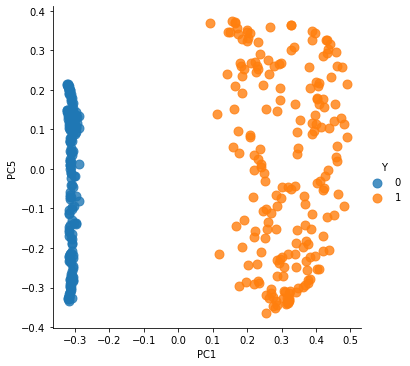

In [82]:
"""
Dapat dilihat bahwa pemisah antar kategori tidak linier melainkan fungsi lingkaran
"""
sns.lmplot(x="PC1", y="PC5",
  data=dfPC_full, 
  fit_reg=False, 
  hue='Y', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) 

# Refference
1. https://nirpyresearch.com/pca-kernel-pca-explained/
2. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
3. https://people.eecs.berkeley.edu/~wainwrig/stat241b/scholkopf_kernel.pdf
4. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py